# PROBLEM STATEMENT

### Key Question: 
" Can we leverage our online conversational data to classify MBTI personlity type and use it to enhance online engagement?"

### Introduction
In the ever-evolving digital landscape, online platforms, chat platforms, and social media platforms continuously seek innovative ways to understand and engage their users effectively. While traditional metrics like page views, clicks, and chat interactions provide valuable insights into user behavior, they fail to capture the nuances of individual preferences and motivations. This presents an opportunity to explore the potential of personality data to enhance user engagement and marketing strategies.

### Case Studies Reference
Case Study 1: Predicting Personality Types from Twitter Posts
https://www.researchgate.net/publication/366614754_Personality_Prediction_from_Twitter_Dataset_using_Machine_Learning 

Case Study 2: Personality Type Based on Myers-Briggs Type Indicator with Text Posting Style by using Traditional and Deep Learning
https://arxiv.org/pdf/2201.08717.pdf

### Target Audience
The primary target audience for this research is "Online Platform Developers"

### Research Methodology
1) Model Development Using Subreddit Posts: We will develop a predictive model using posts from two subreddit forums, specifically the subreddits dedicated to the INFP and ESTJ Myers-Briggs personality types. This phase focuses on analyzing the language and content of these posts to classify them according to the personality type they most likely represent.
#####          Remark: Please be aware that our focus for the model detailed below is primarily on this first method, "Model Development Using Subreddit Posts."

2) Expanding the Model to Include All 16 Personality Types: The model will be expanded to cover all 16 Myers-Briggs personality types, involving posts from 16 different subreddits.

3) Shifting Focus from Posts to People: The model will shift from classifying posts to classifying the people behind them. Participants will take the official MBTI test for model benchmarking.

4) Testing and Adapting the Model Across Platforms: The model will be tested and adjusted across various online platforms, analyzing user behavior and interactions.

5) Tesing with marketing campaign: the model will be tested with marketing professional on each platform to select target group and personalize content for each personality type, using A/B testing to see the result changes in the marketing metrics 

### Expected Contributions
This research is expected to contribute significantly to the understanding of how personality data can enhance user engagement and marketing strategies across digital platforms.

### Anticipated Challenges
Challenges include data privacy concerns, potential biases in personality assessments, and the complexity of integrating personality data into existing platforms.

### Conclusion
The use of personality data represents a promising area of research with the potential to revolutionize user engagement and marketing strategies in the digital landscape. This research aims to provide a comprehensive understanding of leveraging personality data in the digital environment.

--------------------------------------------------------------------------------------------------------------

# PROCEDURE

IMPORT LIBRARIES

DATA COLLECTION VIA WEB SCRAPING

  - subreddit - infp
 
  - subreddit - estj

DATA PREPROCESSING
 
  - Load Data
 
  - INFP Data Checking & Processing
 
  - ESTJ Data Checking & Processing 
 
  - INFP + ESTJ data --> Final Data Checking & Processing

BASE MODEL BUILDING 
  
  - BASE MODEL 1: Include 5 columns  
 
  - BASE MODEL 2: Exclude 1 column which is post type column which is specific to Reddit Website
  
  - BASE MODEL 3: Also Exclude Word "infp", "estj", 'infps", 'estjs" which are considered as data leakage form text column

MODEL TUNING 

  - TUNING 1: Vecorization selection (COUNT vs TF-IDF), stemming/lemmanization selection (yes vs no)
 
  - TUNING 2: Top 3 Models Selection
 
  - TUNING 3: Top 3 Models with parameter tuning 
  
      - TUNING 3.1: Logistic regression
    
      - TUNING 3.2: Radom Forest 
   
      - TUNING 3.3: Gradient Boosting 

CONCLUSION AND BUSINSS RECOMMENDATION 

  - Conclusion

  - Business Recommendation 

  ------------------------------------

 

# IMPORT LIBRARIES

In [1]:
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import emoji
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

-----------------------------

# DATA COLLECTION VIA WEB SCRAPING

## Scraping reddit - infp data

In [448]:
# identify the url of the subreddit
url = 'https://www.reddit.com/r/INFP.json'

In [449]:
# create a custom user-agent
res = requests.get(url, headers={'User-agent': 'kamlarp'})

In [450]:
# check the status code
res.status_code

200

In [451]:
# define dictionary variable for the content of the response
reddit_dict = res.json()

In [452]:
# check the dictionary
print(reddit_dict)

{'kind': 'Listing', 'data': {'after': 't3_17th2xy', 'dist': 26, 'modhash': '', 'geo_filter': None, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'infp', 'selftext': "Join the INFP community in today's Weekly Discussion Thread! This  recurring thread takes place every **Sunday**, providing a space for you  to share anything that's on your mind, ask for advice, or connect with  other like-minded individuals. You can easily search for this thread  using its title. \n\nIn this space you can share anything that's on your mind, ask for advice, or just connect with other like-minded individuals. Whether you're feeling happy, sad, confused, or excited, we're here to listen and support you.       \n\nSo grab your coffee or tea, take a deep breath, and let's chat! What are you currently reading, watching, or listening to? How are you feeling today? Do you have any exciting plans for the day or week? Or maybe you just want to share a beautiful photo or inspiring quote

In [453]:
# check the keys of the dictionary
reddit_dict.keys()

dict_keys(['kind', 'data'])

In [454]:
# check the keys of the data
reddit_dict['kind']

'Listing'

In [455]:
# check the keys of the data
reddit_dict['data']

{'after': 't3_17th2xy',
 'dist': 26,
 'modhash': '',
 'geo_filter': None,
 'children': [{'kind': 't3',
   'data': {'approved_at_utc': None,
    'subreddit': 'infp',
    'selftext': "Join the INFP community in today's Weekly Discussion Thread! This  recurring thread takes place every **Sunday**, providing a space for you  to share anything that's on your mind, ask for advice, or connect with  other like-minded individuals. You can easily search for this thread  using its title. \n\nIn this space you can share anything that's on your mind, ask for advice, or just connect with other like-minded individuals. Whether you're feeling happy, sad, confused, or excited, we're here to listen and support you.       \n\nSo grab your coffee or tea, take a deep breath, and let's chat! What are you currently reading, watching, or listening to? How are you feeling today? Do you have any exciting plans for the day or week? Or maybe you just want to share a beautiful photo or inspiring quote.       \n\nR

In [456]:
# check the keys of the data
reddit_dict['data'].keys()

dict_keys(['after', 'dist', 'modhash', 'geo_filter', 'children', 'before'])

In [457]:
# check the keys of the data
reddit_dict['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'infp',
   'selftext': "Join the INFP community in today's Weekly Discussion Thread! This  recurring thread takes place every **Sunday**, providing a space for you  to share anything that's on your mind, ask for advice, or connect with  other like-minded individuals. You can easily search for this thread  using its title. \n\nIn this space you can share anything that's on your mind, ask for advice, or just connect with other like-minded individuals. Whether you're feeling happy, sad, confused, or excited, we're here to listen and support you.       \n\nSo grab your coffee or tea, take a deep breath, and let's chat! What are you currently reading, watching, or listening to? How are you feeling today? Do you have any exciting plans for the day or week? Or maybe you just want to share a beautiful photo or inspiring quote.       \n\nRemember, this is a safe and positive space for everyone, so please be kind and respectful 

In [458]:
# check the length of the data
len(reddit_dict['data']['children'])

26

In [459]:
# check the detail of the data
reddit_dict['data']['children'][1]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'infp',
  'selftext': '',
  'author_fullname': 't2_jtn25mqf5',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'Fuck you!',
  'link_flair_richtext': [{'e': 'text', 't': 'Discussion'}],
  'subreddit_name_prefixed': 'r/infp',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': '',
  'downs': 0,
  'thumbnail_height': 140,
  'top_awarded_type': None,
  'hide_score': False,
  'name': 't3_17thbxp',
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'upvote_ratio': 0.79,
  'author_flair_background_color': None,
  'ups': 35,
  'total_awards_received': 0,
  'media_embed': {},
  'thumbnail_width': 140,
  'author_flair_template_id': None,
  'is_original_content': False,
  'user_reports': [],
  'secure_media': None,
  'is_reddit_media_domain': True,
  'is_meta': False,
  'category': None,
  'secure_media_embed': {},
  'link_flair_text': 'Discussion',
  'can_mod_post': False,


In [460]:
# check the keys of the data
reddit_dict['data']['children'][0].keys()

dict_keys(['kind', 'data'])

In [461]:
# check the detail of the data
reddit_dict['data']['children'][0]['kind']

't3'

In [462]:
# check the detail of the data
reddit_dict['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'infp',
 'selftext': "Join the INFP community in today's Weekly Discussion Thread! This  recurring thread takes place every **Sunday**, providing a space for you  to share anything that's on your mind, ask for advice, or connect with  other like-minded individuals. You can easily search for this thread  using its title. \n\nIn this space you can share anything that's on your mind, ask for advice, or just connect with other like-minded individuals. Whether you're feeling happy, sad, confused, or excited, we're here to listen and support you.       \n\nSo grab your coffee or tea, take a deep breath, and let's chat! What are you currently reading, watching, or listening to? How are you feeling today? Do you have any exciting plans for the day or week? Or maybe you just want to share a beautiful photo or inspiring quote.       \n\nRemember, this is a safe and positive space for everyone, so please be kind and respectful to one another. Let's make thi

In [463]:
# check the detail of the data
reddit_dict['data']['children'][0]['data']['subreddit']

'infp'

In [464]:
# check the detail of the data
reddit_dict['data']['children'][0]['data']['title']

'📌 Weekly Discussion Thread - November 12, 2023 📌'

In [465]:
# check the detail of the data
reddit_dict['data']['children'][0]['data']['selftext']

"Join the INFP community in today's Weekly Discussion Thread! This  recurring thread takes place every **Sunday**, providing a space for you  to share anything that's on your mind, ask for advice, or connect with  other like-minded individuals. You can easily search for this thread  using its title. \n\nIn this space you can share anything that's on your mind, ask for advice, or just connect with other like-minded individuals. Whether you're feeling happy, sad, confused, or excited, we're here to listen and support you.       \n\nSo grab your coffee or tea, take a deep breath, and let's chat! What are you currently reading, watching, or listening to? How are you feeling today? Do you have any exciting plans for the day or week? Or maybe you just want to share a beautiful photo or inspiring quote.       \n\nRemember, this is a safe and positive space for everyone, so please be kind and respectful to one another. Let's make this a great discussion! 🌸"

In [466]:
# store the data in a list
posts = [p['data'] for p in reddit_dict['data']['children']]

In [467]:
# transform the list into a dataframe
pd.DataFrame(posts)

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,num_crossposts,media,is_video,post_hint,url_overridden_by_dest,preview,poll_data,is_gallery,media_metadata,gallery_data
0,None,infp,Join the INFP community in today's Weekly Disc...,t2_6l4z3,False,None,0,False,"📌 Weekly Discussion Thread - November 12, 2023 📌","[{'e': 'text', 't': 'Discussion'}]",...,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,infp,,t2_jtn25mqf5,False,None,0,False,Fuck you!,"[{'e': 'text', 't': 'Discussion'}]",...,0,None,False,image,https://i.redd.it/si6plha46wzb1.jpg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN
2,None,infp,I was watching a video on YouTube where a rela...,t2_mjlbm0k68,False,None,0,False,Do you think Men and Women can be friends?,"[{'e': 'text', 't': 'Advice'}]",...,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,infp,,t2_bzq7mnsxs,False,None,0,False,I heard y’all like sky pictures,"[{'e': 'text', 't': 'Sky'}]",...,0,None,False,image,https://i.redd.it/680d2grd6szb1.jpg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN
4,None,infp,,t2_r3ar19hl,False,None,0,False,infp,"[{'e': 'text', 't': 'Meme'}]",...,0,None,False,image,https://i.redd.it/8m10jvey6wzb1.png,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN
5,None,infp,Therapy feels so ---- off. So disregarding of ...,t2_nptykdlwr,False,None,0,False,I hate myself,"[{'e': 'text', 't': 'Mental Health'}]",...,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,infp,I’m sorry if my choice of the word isn’t right...,t2_bq6wv5fy,False,None,0,False,“Gender neutral” aura?,"[{'e': 'text', 't': 'Relationships'}]",...,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,None,infp,,t2_56judmkt,False,None,0,False,Happy selfie Sunday,"[{'e': 'text', 't': 'Selfie'}]",...,0,None,False,image,https://i.redd.it/8uydp9qn7xzb1.jpg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN,NaN
8,None,infp,\n\n[View Poll](https://www.reddit.com/poll/17...,t2_mlooiwoxt,False,None,0,False,Poll: how old are you?,"[{'e': 'text', 't': 'Informative'}]",...,0,None,False,NaN,NaN,NaN,"{'prediction_status': None, 'total_stake_amoun...",NaN,NaN,NaN
9,None,infp,"I know we, INFPs are unique on our own. There ...",t2_tanjvbcf,False,None,0,False,Don't you wish or at least ever wonder how you...,"[{'e': 'text', 't': 'Random Thoughts'}]",...,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [468]:
# check the detail of the data
reddit_dict['data']['after']

't3_17th2xy'

In [469]:
# check the detail of the data
pd.DataFrame(posts)['name']

0     t3_17thzt7
1     t3_17thbxp
2     t3_17tjdbj
3     t3_17t3gba
4     t3_17thevy
5     t3_17te2s4
6     t3_17t8q5p
7     t3_17tkgnn
8     t3_17th9rb
9     t3_17tbmu8
10    t3_17t4jd8
11    t3_17swftm
12    t3_17tdxdn
13    t3_17st6fi
14    t3_17tgksd
15    t3_17sw67d
16    t3_17sx4hs
17    t3_17tblls
18    t3_17t6mg0
19    t3_17tix9s
20    t3_17ssv5h
21    t3_17tf5t4
22    t3_17t94mb
23    t3_17tes9w
24    t3_17th8wl
25    t3_17th2xy
Name: name, dtype: object

In [470]:
# call the next pages of the subreddit
url + '?after=' + reddit_dict['data']['after']

'https://www.reddit.com/r/INFP.json?after=t3_17th2xy'

In [471]:
# create a function to get the posts from the subreddit
posts = []
after = None

for a in range(60):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts.extend(current_posts)
    after = current_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/INFP.json
18
https://www.reddit.com/r/INFP.json?after=t3_17th2xy
52
https://www.reddit.com/r/INFP.json?after=t3_17s6pya
57
https://www.reddit.com/r/INFP.json?after=t3_17s3qm9
60
https://www.reddit.com/r/INFP.json?after=t3_17rs95n
27
https://www.reddit.com/r/INFP.json?after=t3_17r79lk
58
https://www.reddit.com/r/INFP.json?after=t3_17qjyo7
39
https://www.reddit.com/r/INFP.json?after=t3_17q5ork
26
https://www.reddit.com/r/INFP.json?after=t3_17pswrz
19
https://www.reddit.com/r/INFP.json?after=t3_17p5hnn
42
https://www.reddit.com/r/INFP.json?after=t3_17ol338
5
https://www.reddit.com/r/INFP.json?after=t3_17nx5rq
45
https://www.reddit.com/r/INFP.json?after=t3_17nlzco
17
https://www.reddit.com/r/INFP.json?after=t3_17nvpma
33
https://www.reddit.com/r/INFP.json?after=t3_17muh63
27
https://www.reddit.com/r/INFP.json?after=t3_17mwtq1
29
https://www.reddit.com/r/INFP.json?after=t3_17m55pm
31
https://www.reddit.com/r/INFP.json?after=t3_17lqi4b
5
https://www.reddit.com/r/INFP

In [472]:
# check the number of the posts
len(posts)

1495

In [473]:
# transform the list into a dataframe into the file csv
pd.DataFrame(posts).to_csv('infp.csv', index = False)

## Scraping reddit - estj data 

In [474]:
#identify url of subreddit
url2 = 'https://www.reddit.com/r/ESTJ.json'

In [475]:
# create a custom user-agent
res2 = requests.get(url2, headers={'User-agent': 'Pony Inc 1.0'})

In [476]:
# check the status code
res2.status_code

200

In [477]:
# define dictionary variable for the content of the response
reddit_dict2 = res2.json()

In [478]:
# check the dictionary
print(reddit_dict2)

{'kind': 'Listing', 'data': {'after': 't3_17bn3d8', 'dist': 26, 'modhash': '', 'geo_filter': None, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'ESTJ', 'selftext': 'Hey everyone, \n\nJust wanted to let everyone know, I\'ve made an update to our Automoderator, I\'ve never been a "reddit mod" before but I do work in Software Development, so I\'ve adjusted it quite a bit since being made a mod. \n\nMy goal with the automod is to limit the amount of spam, hate toward us or any other type and incel based posts all while keeping our ESTJ Rules on the side bar consistent. \n\nFeel free to let me know if you\'d like our Automod to do any other features that you may have seen in other subreddits and I\'ll be happy to add.\n\nRegards,\n\n&amp;#x200B;', 'author_fullname': 't2_5e85fm19', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'Update to our Automoderator', 'link_flair_richtext': [], 'subreddit_name_prefixed': 'r/ESTJ', 'hidde

In [479]:
# store the post data in a list
posts2 = [p['data'] for p in reddit_dict2['data']['children']]

In [481]:
# transform the list into a dataframe
pd.DataFrame(posts2)

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,poll_data,url_overridden_by_dest
0,None,ESTJ,"Hey everyone, \n\nJust wanted to let everyone ...",t2_5e85fm19,False,None,0,False,Update to our Automoderator,[],...,None,True,https://www.reddit.com/r/ESTJ/comments/15g88p1...,5662,1.690981e+09,0,None,False,NaN,NaN
1,None,ESTJ,\n\n[View Poll](https://www.reddit.com/poll/17...,t2_rjf81m4d,False,None,0,False,How old were you when you had your first memory,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17t6sq4...,5662,1.699745e+09,0,None,False,"{'prediction_status': None, 'total_stake_amoun...",NaN
2,None,ESTJ,I'm curious to know what ESTJs enjoy talking a...,t2_84h6kc71,False,None,0,False,What do you like to talk about and what do you...,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17sxi1q...,5662,1.699719e+09,0,None,False,NaN,NaN
3,None,ESTJ,An ESTJ always complains and says her ISTP hus...,t2_74n0bpku,False,None,0,False,Do you guys think you are smart?,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17srkd3...,5662,1.699698e+09,0,None,False,NaN,NaN
4,None,ESTJ,\n\n[View Poll](https://www.reddit.com/poll/17...,t2_1moymyz7,False,None,0,False,Use of memes in texting,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17r18lj...,5662,1.699493e+09,0,None,False,"{'prediction_status': None, 'total_stake_amoun...",NaN
5,None,ESTJ,Anyone else feel like they have a hard time st...,t2_djwfz,False,None,0,False,3 year attention span,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17r5crk...,5662,1.699505e+09,0,None,False,NaN,NaN
6,None,ESTJ,"Based off of what I read on other posts, somet...",t2_ewejrlhq,False,None,0,False,Mixed Signals,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17qgneb...,5662,1.699429e+09,0,None,False,NaN,NaN
7,None,ESTJ,"I have had good experiences with ESTJs, keep b...",t2_f535768r,False,None,0,False,You're amazing!,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17q5917...,5662,1.699393e+09,0,None,False,NaN,NaN
8,None,ESTJ,I am trying to determine how an ESTJ would go ...,t2_f35q8qo22,False,None,0,False,Existential Questions and Philosophy,[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17ppm7q...,5662,1.699345e+09,0,None,False,NaN,NaN
9,None,ESTJ,A research on MBTI and Enneagram correlation....,t2_scj4c2oa,False,None,0,False,"ESTJ, what is your Enneagram type?",[],...,None,False,https://www.reddit.com/r/ESTJ/comments/17p5duo...,5662,1.699285e+09,0,None,False,"{'prediction_status': None, 'total_stake_amoun...",NaN


In [482]:
# call the next pages of the subreddit
posts2 = []
after2 = None

for a in range(60):
    if after2 == None:
        current_url2 = url2
    else:
        current_url2 = url2 + '?after=' + after2
    print(current_url2)
    res2 = requests.get(current_url2, headers={'User-agent': 'Pony Inc 1.0'})
    
    if res2.status_code != 200:
        print('Status error', res2.status_code)
        break
    
    current_dict2 = res2.json()
    current_posts2 = [p['data'] for p in current_dict2['data']['children']]
    posts2.extend(current_posts2)
    after2 = current_dict2['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/ESTJ.json
50
https://www.reddit.com/r/ESTJ.json?after=t3_17bn3d8
40
https://www.reddit.com/r/ESTJ.json?after=t3_16sel1g
56
https://www.reddit.com/r/ESTJ.json?after=t3_1697hut
53
https://www.reddit.com/r/ESTJ.json?after=t3_15ltylx
52
https://www.reddit.com/r/ESTJ.json?after=t3_156qdss
11
https://www.reddit.com/r/ESTJ.json?after=t3_14oudp3
19
https://www.reddit.com/r/ESTJ.json?after=t3_140xybj
23
https://www.reddit.com/r/ESTJ.json?after=t3_13kmnlm
50
https://www.reddit.com/r/ESTJ.json?after=t3_1341llz
11
https://www.reddit.com/r/ESTJ.json?after=t3_12ngr2y
2
https://www.reddit.com/r/ESTJ.json?after=t3_12a1ybr
59
https://www.reddit.com/r/ESTJ.json?after=t3_11xbq04
16
https://www.reddit.com/r/ESTJ.json?after=t3_11i0ny7
15
https://www.reddit.com/r/ESTJ.json?after=t3_1183qre
21
https://www.reddit.com/r/ESTJ.json?after=t3_10rtdqj
50
https://www.reddit.com/r/ESTJ.json?after=t3_10e7x07
46
https://www.reddit.com/r/ESTJ.json?after=t3_zscfau
4
https://www.reddit.com/r/ESTJ.

In [483]:
# check the number of the posts
len(posts2)

1498

In [484]:
# transform the list into a dataframe into the file csv
pd.DataFrame(posts2).to_csv('estj.csv', index = False)

-----------------------------------

# DATA PREPROCESSING

## Load data

In [485]:
# load data from csv file
df_infp=pd.read_csv('infp.csv')
df_estj=pd.read_csv('estj.csv')

## INFP data

In [486]:
# change column name into the list and check the list
infp_col_name = df_infp.columns.tolist()
infp_col_name

['approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'is_created_from_ads_ui',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'author_flair_type',
 'dom

In [487]:
# select the columns that will be used for the analysis
df_infp_selected = df_infp[['id','author_fullname','subreddit','link_flair_text','title', 'selftext','num_comments']]

In [488]:
# check the column type
df_infp_selected.dtypes

id                 object
author_fullname    object
subreddit          object
link_flair_text    object
title              object
selftext           object
num_comments        int64
dtype: object

In [489]:
# check the number of the rows and columns
df_infp_selected.shape

(1495, 7)

In [490]:
# check the first 5 rows of the dataframe
df_infp_selected.head()

,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments
0,17thzt7,t2_6l4z3,infp,Discussion,"📌 Weekly Discussion Thread - November 12, 2023 📌",Join the INFP community in today's Weekly Disc...,0
1,17thbxp,t2_jtn25mqf5,infp,Discussion,Fuck you!,NaN,5
2,17tjdbj,t2_mjlbm0k68,infp,Advice,Do you think Men and Women can be friends?,I was watching a video on YouTube where a rela...,23
3,17t3gba,t2_bzq7mnsxs,infp,Sky,I heard y’all like sky pictures,NaN,9
4,17thevy,t2_r3ar19hl,infp,Meme,infp,NaN,1


In [491]:
# check null value in each column
df_infp_selected.isnull().sum()

id                   0
author_fullname      5
subreddit            0
link_flair_text      0
title                0
selftext           395
num_comments         0
dtype: int64

In [492]:
# check the number of duplicated rows
df_infp_selected_dupcount = df_infp_selected.duplicated(subset=['title', 'selftext']).sum()
print(f'total number of duplciated row is {df_infp_selected_dupcount}')

total number of duplciated row is 506


In [493]:
# drop row wht null values and check the null values in the each column
df_infp_selected_dropna = df_infp_selected.dropna()
print(df_infp_selected_dropna.shape)
print(df_infp_selected_dropna.isnull().sum())

(1095, 7)
id                 0
author_fullname    0
subreddit          0
link_flair_text    0
title              0
selftext           0
num_comments       0
dtype: int64


In [494]:
# add the columns of the length of the title and selftext
df_infp_selected_dropna['selftext_length'] = df_infp_selected_dropna['selftext'].str.len()
df_infp_selected_dropna['title_length'] = df_infp_selected_dropna['title'].str.len()

df_infp_selected_dropna.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4356\2409990966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infp_selected_dropna['selftext_length'] = df_infp_selected_dropna['selftext'].str.len()
C:\Users\HP\AppData\Local\Temp\ipykernel_4356\2409990966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infp_selected_dropna['title_length'] = df_infp_selected_dropna['title'].str.len()


,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length
0,17thzt7,t2_6l4z3,infp,Discussion,"📌 Weekly Discussion Thread - November 12, 2023 📌",Join the INFP community in today's Weekly Disc...,0,955,48
2,17tjdbj,t2_mjlbm0k68,infp,Advice,Do you think Men and Women can be friends?,I was watching a video on YouTube where a rela...,23,811,42
5,17te2s4,t2_nptykdlwr,infp,Mental Health,I hate myself,Therapy feels so ---- off. So disregarding of ...,22,476,13
6,17t8q5p,t2_bq6wv5fy,infp,Relationships,“Gender neutral” aura?,I’m sorry if my choice of the word isn’t right...,34,373,22
8,17th9rb,t2_mlooiwoxt,infp,Informative,Poll: how old are you?,\n\n[View Poll](https://www.reddit.com/poll/17...,0,50,22


In [495]:
# Function to count emojis in a given text
def count_emojis(text):
    return emoji.emoji_count(text)

# Calculate the number of emojis in the 'title' column and create a new column
df_infp_selected_dropna['title_emoji_count'] = df_infp_selected['title'].apply(count_emojis)

# check rows with emoji count
print(df_infp_selected_dropna['title_emoji_count'].value_counts())
df_infp_selected_dropna[df_infp_selected_dropna['title_emoji_count'] > 0].head()

title_emoji_count
0    1061
1      20
2      11
3       2
4       1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_4356\1686903398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infp_selected_dropna['title_emoji_count'] = df_infp_selected['title'].apply(count_emojis)


,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length,title_emoji_count
0,17thzt7,t2_6l4z3,infp,Discussion,"📌 Weekly Discussion Thread - November 12, 2023 📌",Join the INFP community in today's Weekly Disc...,0,955,48,2
25,17th2xy,t2_eatabkl2,infp,Venting,I know you guys have good intentions but pleas...,"I texted ""I miss youuu"" to an infp friend and ...",6,859,56,1
184,17qdvjl,t2_lw2vj60qy,infp,Polls,"☁️ If you were going to die in 3 days, what wo...",\n\n[View Poll](https://www.reddit.com/poll/17...,1,50,57,1
203,17pm78u,t2_j34u7nwo1,infp,Mental Health,Any other INFPs buy themselves flowers regular...,I tagged it mental health flair bc it never fa...,6,140,87,1
273,17o99zd,t2_4wym49ke,infp,Artwork,My first digital paintings using Krita ☺️,I like to paint so recently I bought a graphic...,2,205,41,1


## ESTJ data

In [496]:
# Select columns used for analysis
df_estj_selected = df_estj[['id','author_fullname','subreddit','link_flair_text','title', 'selftext','num_comments']]

In [497]:
# check the number of duplicated rows
df_estj_selected_count = df_estj_selected.duplicated(subset = ['title', 'selftext']).sum()
print(f'total number of duplciated row is {df_infp_selected_dupcount}')

total number of duplciated row is 506


In [498]:
# check the rows with null values
df_estj_selected.isnull().sum()

id                   0
author_fullname    201
subreddit            0
link_flair_text      0
title                0
selftext           388
num_comments         0
dtype: int64

In [501]:
# remove the rows with null values and show the number of rows and columns, and check the null values in the each column
df_estj_selected_dropna = df_estj_selected.dropna()
print(df_estj_selected_dropna.shape)
print(df_estj_selected_dropna.isnull().sum())

(953, 7)
id                 0
author_fullname    0
subreddit          0
link_flair_text    0
title              0
selftext           0
num_comments       0
dtype: int64


In [502]:
# create the columns of the length of the title and selftext 
df_estj_selected_dropna['selftext_length'] = df_estj_selected_dropna['selftext'].str.len()
df_estj_selected_dropna['title_length'] = df_estj_selected_dropna['title'].str.len()
print(df_estj_selected_dropna.shape)
df_estj_selected_dropna.head()

(953, 9)


C:\Users\HP\AppData\Local\Temp\ipykernel_4356\3500845134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estj_selected_dropna['selftext_length'] = df_estj_selected_dropna['selftext'].str.len()
C:\Users\HP\AppData\Local\Temp\ipykernel_4356\3500845134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estj_selected_dropna['title_length'] = df_estj_selected_dropna['title'].str.len()


,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length
0,15g88p1,t2_5e85fm19,ESTJ,Mod Post,Update to our Automoderator,"Hey everyone, \n\nJust wanted to let everyone ...",15,570,27
1,17t6sq4,t2_rjf81m4d,ESTJ,Discussion/Poll,How old were you when you had your first memory,\n\n[View Poll](https://www.reddit.com/poll/17...,4,50,47
2,17sxi1q,t2_84h6kc71,ESTJ,Discussion/Poll,What do you like to talk about and what do you...,I'm curious to know what ESTJs enjoy talking a...,3,167,70
3,17srkd3,t2_74n0bpku,ESTJ,Question/Advice,Do you guys think you are smart?,An ESTJ always complains and says her ISTP hus...,27,200,32
4,17r18lj,t2_1moymyz7,ESTJ,Discussion/Poll,Use of memes in texting,\n\n[View Poll](https://www.reddit.com/poll/17...,2,50,23


In [503]:
# create the column of the emoji count in the title
df_estj_selected_dropna['title_emoji_count'] = df_estj_selected['title'].apply(count_emojis)
# check rows with emoji count
print(df_estj_selected_dropna['title_emoji_count'].value_counts())
df_estj_selected_dropna.head()

title_emoji_count
0    939
1     10
2      4
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_4356\2000559318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estj_selected_dropna['title_emoji_count'] = df_estj_selected['title'].apply(count_emojis)


,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length,title_emoji_count
0,15g88p1,t2_5e85fm19,ESTJ,Mod Post,Update to our Automoderator,"Hey everyone, \n\nJust wanted to let everyone ...",15,570,27,0
1,17t6sq4,t2_rjf81m4d,ESTJ,Discussion/Poll,How old were you when you had your first memory,\n\n[View Poll](https://www.reddit.com/poll/17...,4,50,47,0
2,17sxi1q,t2_84h6kc71,ESTJ,Discussion/Poll,What do you like to talk about and what do you...,I'm curious to know what ESTJs enjoy talking a...,3,167,70,0
3,17srkd3,t2_74n0bpku,ESTJ,Question/Advice,Do you guys think you are smart?,An ESTJ always complains and says her ISTP hus...,27,200,32,0
4,17r18lj,t2_1moymyz7,ESTJ,Discussion/Poll,Use of memes in texting,\n\n[View Poll](https://www.reddit.com/poll/17...,2,50,23,0


##  INFP &  ESTJ --> Final Data Frame

In [504]:
# combine the two dataframes
final_df = pd.concat([df_infp_selected_dropna, df_estj_selected_dropna], ignore_index=True)
print(final_df.shape)
print(final_df.duplicated().sum())
print(final_df.isnull().sum())

(2048, 10)
727
id                   0
author_fullname      0
subreddit            0
link_flair_text      0
title                0
selftext             0
num_comments         0
selftext_length      0
title_length         0
title_emoji_count    0
dtype: int64


In [505]:
# check the number of rows in each subreddit
final_df['subreddit'].value_counts()

subreddit
infp    1095
ESTJ     953
Name: count, dtype: int64

In [506]:
# check the first 5 rows of the dataframe
final_df.head()

,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length,title_emoji_count
0,17thzt7,t2_6l4z3,infp,Discussion,"📌 Weekly Discussion Thread - November 12, 2023 📌",Join the INFP community in today's Weekly Disc...,0,955,48,2
1,17tjdbj,t2_mjlbm0k68,infp,Advice,Do you think Men and Women can be friends?,I was watching a video on YouTube where a rela...,23,811,42,0
2,17te2s4,t2_nptykdlwr,infp,Mental Health,I hate myself,Therapy feels so ---- off. So disregarding of ...,22,476,13,0
3,17t8q5p,t2_bq6wv5fy,infp,Relationships,“Gender neutral” aura?,I’m sorry if my choice of the word isn’t right...,34,373,22,0
4,17th9rb,t2_mlooiwoxt,infp,Informative,Poll: how old are you?,\n\n[View Poll](https://www.reddit.com/poll/17...,0,50,22,0


In [507]:
# check the last 5 rows of the dataframe
final_df.tail()

,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length,title_emoji_count
2043,wlawwn,t2_7a6vie0k,ESTJ,Question/Advice,Household-/Coping-Strategies for a Likely Fami...,"Asking here, since u might enjoy the preparing...",3,229,84,0
2044,wkksh9,t2_915ksnvu,ESTJ,Relationships,ESTJs and nicknames,"I (Infp, female) adopted a nickname for my EST...",3,269,19,0
2045,wii9rc,t2_ace86i2j,ESTJ,Relationships,"Is ""Acts of service"" one of your love language...",What are your love languages?,5,29,97,0
2046,wilkur,t2_ace86i2j,ESTJ,Discussion/Poll,"Misses and Misters Te Doms, do you like to con...",Would you say smething just because you want t...,4,143,104,0
2047,wgvrev,t2_qytuqy6q,ESTJ,Discussion/Poll,Anyone else on here hate sentimental and needy...,\n\n[View Poll](https://www.reddit.com/poll/wg...,5,49,54,0


In [508]:
# combine the title and selftext columns int to text column
final_df['text'] = final_df['title'] + " " + final_df['selftext']
final_df.head()

,id,author_fullname,subreddit,link_flair_text,title,selftext,num_comments,selftext_length,title_length,title_emoji_count,text
0,17thzt7,t2_6l4z3,infp,Discussion,"📌 Weekly Discussion Thread - November 12, 2023 📌",Join the INFP community in today's Weekly Disc...,0,955,48,2,"📌 Weekly Discussion Thread - November 12, 2023..."
1,17tjdbj,t2_mjlbm0k68,infp,Advice,Do you think Men and Women can be friends?,I was watching a video on YouTube where a rela...,23,811,42,0,Do you think Men and Women can be friends? I w...
2,17te2s4,t2_nptykdlwr,infp,Mental Health,I hate myself,Therapy feels so ---- off. So disregarding of ...,22,476,13,0,I hate myself Therapy feels so ---- off. So di...
3,17t8q5p,t2_bq6wv5fy,infp,Relationships,“Gender neutral” aura?,I’m sorry if my choice of the word isn’t right...,34,373,22,0,“Gender neutral” aura? I’m sorry if my choice ...
4,17th9rb,t2_mlooiwoxt,infp,Informative,Poll: how old are you?,\n\n[View Poll](https://www.reddit.com/poll/17...,0,50,22,0,Poll: how old are you? \n\n[View Poll](https:/...


In [509]:
# replace url with empty string
# Define a function that applies the regex substitution to a given string.
def remove_url(s):
    return re.sub(r'https?.+?(?:\s|$)', '', s)

# Apply this function to each row in the 'text' column.
final_df['text'] = final_df['text'].apply(remove_url)

## Summary

 - we load data from infp subreddit 
 - we load data from estj subreddit 
 - we concat both data into 1 data frame 
 - we select 10 columns including 
        - id                  
        - author_fullname      
        - subreddit           
        - link_flair_text      
        - title               
        - selftext            
        - num_comments         
        - selftext_length      
        - title_length        
        - title_emoji_count 
 - we combine title and selftext column into 1 column called text column 
 - we remove all text that are url 
-----------------------------------

# BASE MODEL BUILDING

## BASE MODEL 1 : includes all columns and data 

### Feature Engineering

In [510]:
#define X,y data
X = final_df[['link_flair_text','text','num_comments', 'selftext_length', 'title_length', 'title_emoji_count']]
y = final_df['subreddit']

In [511]:
# Dummy encoding for 'link_flair_text'
X = pd.get_dummies(X, columns=['link_flair_text'], drop_first=True, dtype=int)

In [512]:
# Count vectorization for text columns
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(X['text'])

In [513]:
# Combine text features with other numeric features
X_numeric = X.drop(['text'], axis=1)
X = pd.concat([X_numeric, pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [514]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [515]:
# Standard Scaling for numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling & Evaluating

In [516]:
# Build the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [517]:
# Make predictions on the training and testing data
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

In [518]:
print('--- TRAIN ---')
print(classification_report(y_train, y_train_pred))

print('--- TEST ---')
print(classification_report(y_test, y_test_pred))

--- TRAIN ---
              precision    recall  f1-score   support

        ESTJ       1.00      1.00      1.00       762
        infp       1.00      1.00      1.00       876

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638

--- TEST ---
              precision    recall  f1-score   support

        ESTJ       0.98      0.97      0.97       191
        infp       0.97      0.98      0.98       219

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



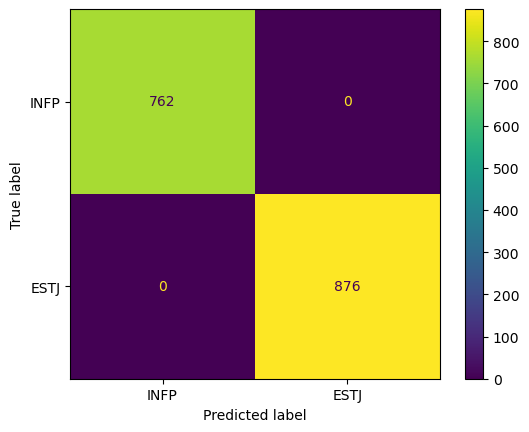

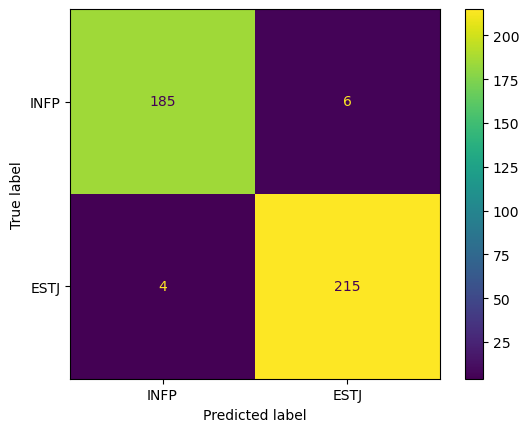

In [519]:
# Confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred )
test_cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(train_cm, display_labels=['INFP', 'ESTJ']).plot()
ConfusionMatrixDisplay(test_cm, display_labels=['INFP', 'ESTJ']).plot()

### Analyzing Feature Coefficients 

In [520]:
# Get the coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X.columns

In [521]:
# Create a DataFrame to display the coefficients and their associated features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [522]:
# Sort the DataFrame by the absolute value of coefficients to identify the most impactful features
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

In [523]:
# Display the sorted coefficients DataFrame
print("Top Coefficients:")
print(sorted_coefficients_df.head(25))

Top Coefficients:
                               Feature  Coefficient  Absolute Coefficient
8      link_flair_text_Discussion/Poll    -1.160626              1.160626
20     link_flair_text_Question/Advice    -1.045713              1.045713
7           link_flair_text_Discussion     1.033154              1.033154
19               link_flair_text_Polls     0.672370              0.672370
3449                              estj    -0.621725              0.621725
11         link_flair_text_Informative     0.542754              0.542754
5104                              infp     0.473646              0.473646
3451                             estjs    -0.451328              0.451328
22       link_flair_text_Relationships    -0.433815              0.433815
9                 link_flair_text_Fun!    -0.405160              0.405160
27             link_flair_text_Venting     0.364498              0.364498
8882                              slow     0.352813              0.352813
5106                

In [524]:
# Categorize features into three groups: categorical, numerical, and text

# Categorical features (dummified)
categorical_features = [col for col in X.columns if col.startswith('link_flair_text_')]

# Numerical features from the original data
numerical_features = ['num_comments', 'selftext_length', 'title_length', 'title_emoji_count']

# Text features (Count Vectorized)
text_features = [col for col in X.columns if col not in (categorical_features + numerical_features)]

In [525]:
# Get the coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X.columns

In [526]:
# Create a DataFrame to display the coefficients and their associated features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [527]:
# Sort the DataFrame by the absolute value of coefficients to identify the most impactful features
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

In [528]:
# Separate coefficients for each group
categorical_feature_coefficients = sorted_coefficients_df[sorted_coefficients_df['Feature'].isin(categorical_features)]
numerical_feature_coefficients = sorted_coefficients_df[sorted_coefficients_df['Feature'].isin(numerical_features)]
text_feature_coefficients = sorted_coefficients_df[sorted_coefficients_df['Feature'].isin(text_features)]

In [529]:
# Display coefficients for each group
print("Categorical Feature Coefficients:")
print(categorical_feature_coefficients)


Categorical Feature Coefficients:
                            Feature  Coefficient  Absolute Coefficient
8   link_flair_text_Discussion/Poll    -1.160626              1.160626
20  link_flair_text_Question/Advice    -1.045713              1.045713
7        link_flair_text_Discussion     1.033154              1.033154
19            link_flair_text_Polls     0.672370              0.672370
11      link_flair_text_Informative     0.542754              0.542754
22    link_flair_text_Relationships    -0.433815              0.433815
9              link_flair_text_Fun!    -0.405160              0.405160
27          link_flair_text_Venting     0.364498              0.364498
17            link_flair_text_Music     0.319025              0.319025
21  link_flair_text_Random Thoughts     0.301028              0.301028
26              link_flair_text_Sky     0.296318              0.296318
24             link_flair_text_Self    -0.276358              0.276358
15    link_flair_text_Mental Health     0.2

In [530]:
print("\nNumerical Feature Coefficients:")
print(numerical_feature_coefficients)



Numerical Feature Coefficients:
             Feature  Coefficient  Absolute Coefficient
0       num_comments     0.308868              0.308868
3  title_emoji_count     0.056671              0.056671
2       title_length    -0.041927              0.041927
1    selftext_length     0.010211              0.010211


In [531]:
print("\nText Feature Coefficients:")
print(text_feature_coefficients.head(25))


Text Feature Coefficients:
            Feature  Coefficient  Absolute Coefficient
3449           estj    -0.621725              0.621725
5104           infp     0.473646              0.473646
3451          estjs    -0.451328              0.451328
8882           slow     0.352813              0.352813
5106          infps     0.341149              0.341149
9572           talk     0.247517              0.247517
6092        mbtilab    -0.224980              0.224980
8328           rude     0.219637              0.219637
1898          combo     0.218126              0.218126
10658          what    -0.217728              0.217728
1557            cat     0.215103              0.215103
5867        looking     0.203892              0.203892
3591    experiences    -0.198354              0.198354
10763         woman    -0.197832              0.197832
4084     friendship     0.194779              0.194779
1555         casual     0.192073              0.192073
7105       perceive    -0.185743     

## BASE MODEL 2 : Exclude post types column which is specific to Reddit website

### Feature Engineering

In [532]:
# check X columns 
X.columns

Index(['num_comments', 'selftext_length', 'title_length', 'title_emoji_count',
       'link_flair_text_Animal(s)', 'link_flair_text_Artwork',
       'link_flair_text_Creative', 'link_flair_text_Discussion',
       'link_flair_text_Discussion/Poll', 'link_flair_text_Fun!',
       ...
       'zero', 'zesty', 'zillion', 'zimbabwe', 'zimmer', 'zodiac', 'zone',
       'zoning', 'zoom', 'ㅠㅡㅠ'],
      dtype='object', length=10928)

In [533]:
# Drop columns that start with 'link_flair_text_' and create X2 dataframe
X2 = X.drop(columns=[col for col in X.columns if col.startswith('link_flair_text_')])

In [534]:
# Split the data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, stratify = y, random_state=42)

In [535]:
# Standard Scaling for numerical features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

### Modeling & Evaluating

In [536]:
# Build the logistic regression model
logistic_model2 = LogisticRegression()
logistic_model2.fit(X2_train, y_train)

LogisticRegression()

In [537]:
# Make predictions on the training and testing data
y_train_pred2 = logistic_model2.predict(X2_train)
y_test_pred2 = logistic_model2.predict(X2_test)

In [538]:
#generate clssification report to evaluate the model
print('--- TRAIN ---')
print(classification_report(y_train, y_train_pred2))

print('--- TEST ---')
print(classification_report(y_test, y_test_pred2))

--- TRAIN ---
              precision    recall  f1-score   support

        ESTJ       1.00      1.00      1.00       762
        infp       1.00      1.00      1.00       876

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638

--- TEST ---
              precision    recall  f1-score   support

        ESTJ       0.88      0.92      0.90       191
        infp       0.93      0.89      0.91       219

    accuracy                           0.91       410
   macro avg       0.91      0.91      0.91       410
weighted avg       0.91      0.91      0.91       410



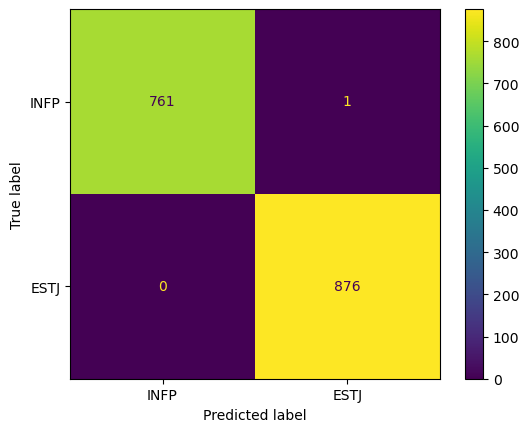

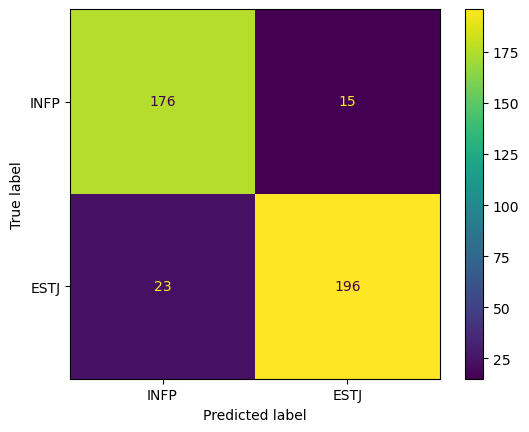

In [539]:
# Confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred2 )
test_cm = confusion_matrix(y_test, y_test_pred2)

ConfusionMatrixDisplay(train_cm, display_labels=['INFP', 'ESTJ']).plot()
ConfusionMatrixDisplay(test_cm, display_labels=['INFP', 'ESTJ']).plot()

### Analysing Feature Coefficients 

In [540]:
# Get the coefficients and feature names
coefficients2 = logistic_model2.coef_[0]
feature_names2 = X2.columns

In [541]:
# Create a DataFrame to display the coefficients and their associated features
coefficients_df2 = pd.DataFrame({'Feature': feature_names2, 'Coefficient': coefficients2})

In [542]:
# Sort the DataFrame by the absolute value of coefficients to identify the most impactful features
coefficients_df2['Absolute Coefficient'] = coefficients_df2['Coefficient'].abs()
sorted_coefficients_df2 = coefficients_df2.sort_values(by='Absolute Coefficient', ascending=False)

In [543]:
# Display the sorted coefficients DataFrame
print("Top Coefficients:")
print(sorted_coefficients_df2.head(25))

Top Coefficients:
            Feature  Coefficient  Absolute Coefficient
3424           estj    -1.227149              1.227149
5079           infp     1.082287              1.082287
3426          estjs    -0.797868              0.797868
0      num_comments     0.711729              0.711729
5081          infps     0.553293              0.553293
9167         status     0.517982              0.517982
6736            old     0.473945              0.473945
4059     friendship     0.426826              0.426826
4188      generally    -0.425567              0.425567
7514       problems     0.421824              0.421824
1532            cat     0.395529              0.395529
2675        develop     0.376632              0.376632
5866           love     0.372858              0.372858
10741        wonder     0.363518              0.363518
10879      yourself     0.356421              0.356421
8857           slow     0.355230              0.355230
5984   manipulative     0.348085              0

In [544]:
# Categorize features into three groups: categorical, numerical, and text

# Categorical features (dummified)
categorical_features2 = [col for col in X2.columns if col.startswith('link_flair_text_')]

# Numerical features from the original data
numerical_features2 = ['num_comments', 'selftext_length', 'title_length', 'title_emoji_count']

# Text features (Count Vectorized)
text_features2 = [col for col in X2.columns if col not in (categorical_features + numerical_features)]

In [545]:
# Separate coefficients for each group
categorical_feature_coefficients2 = sorted_coefficients_df2[sorted_coefficients_df2['Feature'].isin(categorical_features2)]
numerical_feature_coefficients2 = sorted_coefficients_df2[sorted_coefficients_df2['Feature'].isin(numerical_features2)]
text_feature_coefficients2 = sorted_coefficients_df2[sorted_coefficients_df2['Feature'].isin(text_features2)]

In [546]:
# Display coefficients for each group
print("Categorical Feature Coefficients:")
print(categorical_feature_coefficients2)

Categorical Feature Coefficients:
Empty DataFrame
Columns: [Feature, Coefficient, Absolute Coefficient]
Index: []


In [547]:
print("\nNumerical Feature Coefficients:")
print(numerical_feature_coefficients)



Numerical Feature Coefficients:
             Feature  Coefficient  Absolute Coefficient
0       num_comments     0.308868              0.308868
3  title_emoji_count     0.056671              0.056671
2       title_length    -0.041927              0.041927
1    selftext_length     0.010211              0.010211


In [548]:
print("\nText Feature Coefficients:")
print(text_feature_coefficients.head(25))


Text Feature Coefficients:
            Feature  Coefficient  Absolute Coefficient
3449           estj    -0.621725              0.621725
5104           infp     0.473646              0.473646
3451          estjs    -0.451328              0.451328
8882           slow     0.352813              0.352813
5106          infps     0.341149              0.341149
9572           talk     0.247517              0.247517
6092        mbtilab    -0.224980              0.224980
8328           rude     0.219637              0.219637
1898          combo     0.218126              0.218126
10658          what    -0.217728              0.217728
1557            cat     0.215103              0.215103
5867        looking     0.203892              0.203892
3591    experiences    -0.198354              0.198354
10763         woman    -0.197832              0.197832
4084     friendship     0.194779              0.194779
1555         casual     0.192073              0.192073
7105       perceive    -0.185743     

## BASE MODEL 3 : also exclude word 'infp', 'estj', 'infps', 'estjs' in 'text' column

### Feature Engineering

In [549]:
X3 = X2.drop(columns=['infp', 'estj', 'infps', 'estjs'])


In [550]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, stratify = y, random_state=42)

In [551]:
# Standard Scaling for numerical features
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

### Modeling & Evaluating

In [552]:
# Build the logistic regression model
logistic_model3 = LogisticRegression()
logistic_model3.fit(X3_train, y_train)

LogisticRegression()

In [553]:
# Make predictions on the training and testing data
y_train_pred3 = logistic_model3.predict(X3_train)
y_test_pred3 = logistic_model3.predict(X3_test)

In [554]:
#generate clssification report to evaluate the model
print('--- TRAIN ---')
print(classification_report(y_train, y_train_pred3))
print('--- TEST ---')
print(classification_report(y_test, y_test_pred3))

--- TRAIN ---
              precision    recall  f1-score   support

        ESTJ       1.00      1.00      1.00       762
        infp       1.00      1.00      1.00       876

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638

--- TEST ---
              precision    recall  f1-score   support

        ESTJ       0.83      0.93      0.87       191
        infp       0.93      0.83      0.88       219

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



### Analysing Feature Coefficients 

In [555]:
# Get the coefficients and feature names
coefficients3 = logistic_model3.coef_[0]
feature_names3 = X3.columns

In [556]:
# Create a DataFrame to display the coefficients and their associated features
coefficients_df3 = pd.DataFrame({'Feature': feature_names3, 'Coefficient': coefficients3})  

In [557]:
# Sort the DataFrame by the absolute value of coefficients to identify the most impactful features
coefficients_df3['Absolute Coefficient'] = coefficients_df3['Coefficient'].abs()
coefficients_df3 = coefficients_df3.sort_values(by='Absolute Coefficient', ascending=False)

In [558]:
# Display the sorted coefficients DataFrame
print("Top Coefficients:")
print(coefficients_df3.head(25))

Top Coefficients:
            Feature  Coefficient  Absolute Coefficient
0      num_comments     0.846715              0.846715
9163         status     0.533720              0.533720
6732            old     0.521539              0.521539
8853           slow     0.508115              0.508115
10411         vibes     0.478321              0.478321
4057     friendship     0.457567              0.457567
5862           love     0.445567              0.445567
1532            cat     0.440786              0.440786
10875      yourself     0.425062              0.425062
2675        develop     0.424086              0.424086
7308           poll     0.392749              0.392749
5980   manipulative     0.392292              0.392292
4186      generally    -0.389294              0.389294
7510       problems     0.375402              0.375402
3564    experiences    -0.359434              0.359434
8722           side    -0.357282              0.357282
2712            die     0.356935              0

## Summary
 - in base model 1, we include select 5 columns including 'link_flair_text','text','num_comments', 'selftext_length', 'title_length', 'title_emoji_count'
       
        - link_flair_text is categorical data which we get dummify 
        - text is text data which tokenize 
        - other columns are numerical data which we do standard scaling 

 - as a result, we get very high accuracry score train = 1.0 vs test = 0.98
 - after in investigating coefficient, we found that link_flair_text column and word 'infp', 'estj', 'infps', 'estjs' are top coefficient
 - in base model 2, we exclude 'link_flair_text' column which is specific to reddit website 
 - as a result, we get lower accuracy score train = 1.0 and vs text = 0.91
 - in base model 3, we exclude word 'infp', 'estj', 'infps', 'estjs' which we regard as the data leakage in the text column.
 - as a result, we get even lower accuracy score tain = 1.0 vs text = 0.88
 - as the next step, we will start tunning our model to increase the accuracy score 
----------------------------

# MODEL TUNING

## TUNING1 : Vectorization Selection & Steming/Lemmanization Selection

### Remark

 - we will use only data set in base model 3
 - we will use only logistic regression model with default parameter
 - we will test different vectorinzation including count vectorization(CVEC), TF-IDF vectorization(TVEC)
 - we will test stemming/lemmaniation vs no stemming/lemmanization
 - in conclusion, there will be 4 combination of results


### Feature Engineering, Modeling & Evaluating

In [559]:
# Define stemming and lemmatization functions
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [560]:
def tokenize_text(text, stemming=False, lemmatization=False):
    tokens = text.split()
    
    if stemming:
        tokens = [stemmer.stem(token) for token in tokens]
    
    if lemmatization:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

In [561]:
X_base = final_df[['text','num_comments', 'selftext_length', 'title_length', 'title_emoji_count']]

In [562]:
# Split the data into train and test sets
X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)


In [563]:
logregs = [
    LogisticRegression(), # count vectorizer, True, True
    LogisticRegression(), # count vectorizer, False, False
    LogisticRegression(), # tfidf vectorizer, True, True
    LogisticRegression(), # tfidf vectorizer, False, False
]

In [564]:
# Create a dictionary of vectorizers
vectorizers = {
    'Count Vectorizer': CountVectorizer(),
    'TF-IDF Vectorizer': TfidfVectorizer()
}

In [565]:
# Create a list of stemming and lemmatization options
stemming_lemmatization_options = [
    {'stemming': True, 'lemmatization': True},
    {'stemming': False, 'lemmatization': False}
]

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Vectorization Method: Count Vectorizer, Stemming: True, Lemmatization: True
Accuracy: 0.8975609756097561
Precision: 0.8993329119412419
Recall: 0.8975609756097561
F1 Score: 0.8976781575923288
--- Test Classification Report ---
              precision    recall  f1-score   support

        ESTJ       0.87      0.92      0.89       191
        infp       0.93      0.88      0.90       219

    accuracy                           0.90       410
   macro avg       0.90      0.90      0.90       410
weighted avg       0.90      0.90      0.90       410



c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Vectorization Method: Count Vectorizer, Stemming: False, Lemmatization: False
Accuracy: 0.8780487804878049
Precision: 0.8803807257584771
Recall: 0.8780487804878049
F1 Score: 0.8781911382578664
--- Test Classification Report ---
              precision    recall  f1-score   support

        ESTJ       0.84      0.91      0.87       191
        infp       0.91      0.85      0.88       219

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410

Vectorization Method: TF-IDF Vectorizer, Stemming: True, Lemmatization: True
Accuracy: 0.8390243902439024
Precision: 0.838938295332451
Recall: 0.8390243902439024
F1 Score: 0.8389010638651958
--- Test Classification Report ---
              precision    recall  f1-score   support

        ESTJ       0.83      0.82      0.83       191
        infp       0.84      0.86      0.85       219

    accuracy                           0.84       410
 

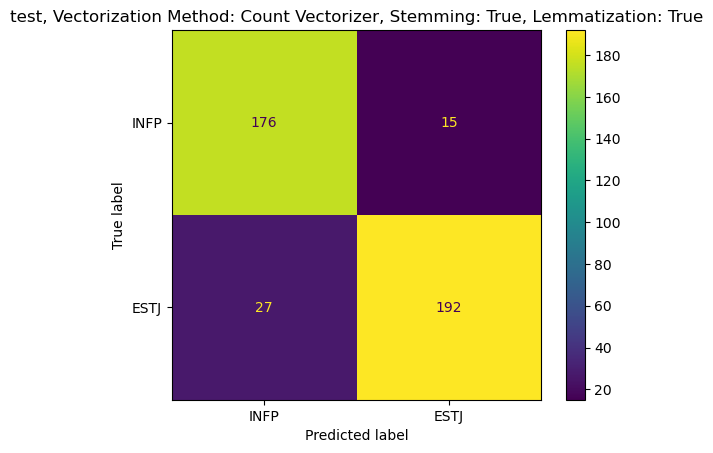

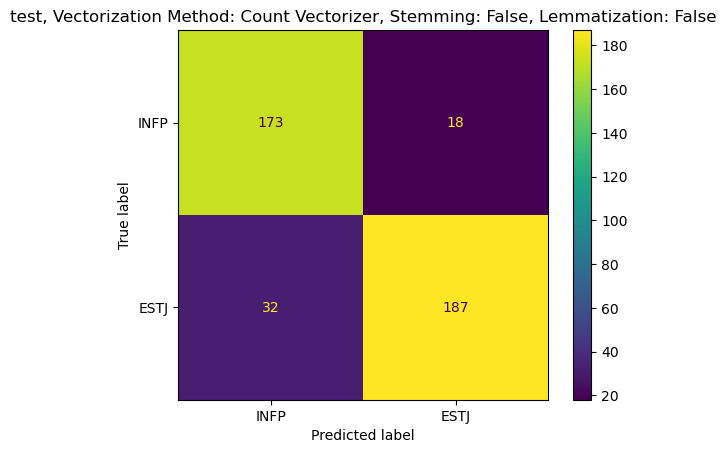

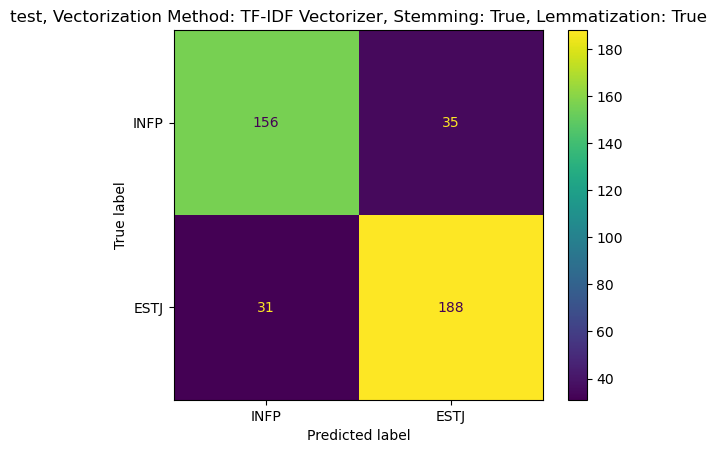

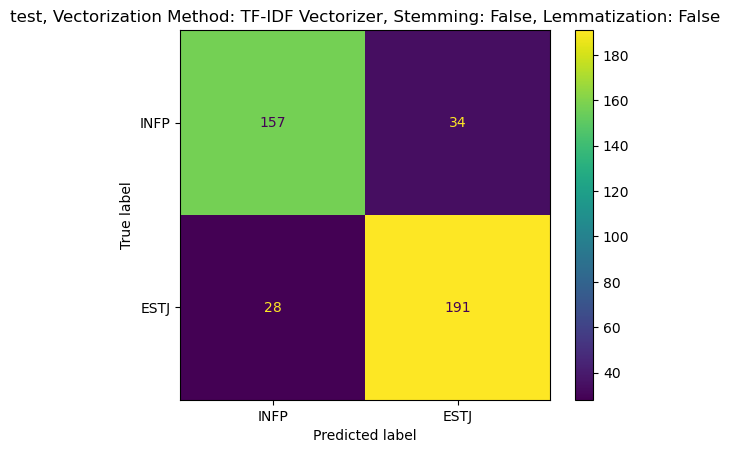

In [566]:
results = []
i = 0 # index for logregs
# Loop through vectorization methods and stemming/lemmatization options
for vectorizer_name, vectorizer in vectorizers.items():
    for options in stemming_lemmatization_options:
        stemming = options['stemming']
        lemmatization = options['lemmatization']

        # Tokenize the text column
        X_base_train['tokenized_text'] = X_base_train['text'].apply(lambda x: tokenize_text(x, stemming, lemmatization))
        X_base_test['tokenized_text'] = X_base_test['text'].apply(lambda x: tokenize_text(x, stemming, lemmatization))

        # Vectorize the tokenized text
        X_base_train_vectorized = vectorizer.fit_transform(X_base_train['tokenized_text'])
        X_base_test_vectorized = vectorizer.transform(X_base_test['tokenized_text'])

        # Standardize the numerical columns
        scaler = StandardScaler()
        numerical_columns = ['num_comments', 'selftext_length', 'title_length', 'title_emoji_count']

        X_base_train_scaled = scaler.fit_transform(X_base_train[numerical_columns])
        X_base_test_scaled = scaler.transform(X_base_test[numerical_columns])

        # Combine vectorized text and scaled numerical columns
        X_base_train_combined = pd.concat([pd.DataFrame(X_base_train_vectorized.toarray(), columns= vectorizer.get_feature_names_out()), pd.DataFrame(X_base_train_scaled, columns=numerical_columns)], axis=1)
        X_base_test_combined = pd.concat([pd.DataFrame(X_base_test_vectorized.toarray(), columns= vectorizer.get_feature_names_out()), pd.DataFrame(X_base_test_scaled, columns=numerical_columns)], axis=1)

        # remove the word infp, estj, infps, estjs from the columns
        X_base_train_combined = X_base_train_combined.drop(columns=['infp', 'estj', 'infps', 'estjs'])
        X_base_test_combined = X_base_test_combined.drop(columns=['infp', 'estj', 'infps', 'estjs'])    

        # Build the logistic regression model
        logistic_model_base = logregs[i]
        logistic_model_base.fit(X_base_train_combined, y_train)

        # Make predictions
        y_base_train_pred = logistic_model_base.predict(X_base_train_combined)
        y_base_test_pred = logistic_model_base.predict(X_base_test_combined)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_base_test_pred)
        precision = precision_score(y_test, y_base_test_pred, average='weighted')
        recall = recall_score(y_test, y_base_test_pred, average='weighted')
        f1 = f1_score(y_test, y_base_test_pred, average='weighted')

        # Generate classification report
        test_classification_report = classification_report(y_test, y_base_test_pred)

        # Generate confusion matrix and display
        test_cm = confusion_matrix(y_test, y_base_test_pred)

        print(f"Vectorization Method: {vectorizer_name}, Stemming: {stemming}, Lemmatization: {lemmatization}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("--- Test Classification Report ---")
        print(test_classification_report)

        results.append({
            'Vectorization Method': vectorizer_name,
            'Stemming': stemming,
            'Lemmatization': lemmatization,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
                
        ConfusionMatrixDisplay(test_cm, display_labels=['INFP', 'ESTJ']).plot()
        plt.title(f"test, Vectorization Method: {vectorizer_name}, Stemming: {stemming}, Lemmatization: {lemmatization}");

        i += 1

# Create a DataFrame to compare the results
results_df = pd.DataFrame(results)
print(results_df)

### Analysing Feature Coefficients

In [568]:
# Get the coefficients and feature names
coefficients_base = logregs[3].coef_[0]
feature_names_base =  X_base_train_combined.columns

In [569]:
# Create a DataFrame to display the coefficients and their associated features
coefficients_df_base = pd.DataFrame({'Feature': feature_names_base, 'Coefficient': coefficients_base})

In [570]:
# Sort the DataFrame by the absolute value of coefficients to identify the most impactful features
coefficients_df_base['Absolute Coefficient'] = coefficients_df_base['Coefficient'].abs()
sorted_coefficients_df_base = coefficients_df_base.sort_values(by='Absolute Coefficient', ascending=False)

In [571]:
# Display the sorted coefficients DataFrame
print("Top Coefficients:")
print(sorted_coefficients_df_base.head(25))

Top Coefficients:
         Feature  Coefficient  Absolute Coefficient
3544        feel     2.250897              2.250897
9503       types    -2.054889              2.054889
5720        mbti    -2.000346              2.000346
10027       what    -1.935942              1.935942
9501        type    -1.897264              1.897264
5131        just     1.881714              1.881714
9028          te    -1.749505              1.749505
2752          do    -1.748054              1.748054
3548     feeling     1.716331              1.716331
5041          it     1.658844              1.658844
4159        guys    -1.598104              1.598104
7275   questions    -1.586455              1.586455
10145       work    -1.540911              1.540911
5039        istp    -1.538358              1.538358
10257        you    -1.509074              1.509074
3819     friends     1.489450              1.489450
6052          my     1.448859              1.448859
8223          si    -1.341935              1.3

In [572]:
# Categorize features into three groups: categorical, numerical, and text

# Categorical features (dummified)
categorical_features = [col for col in X.columns if col.startswith('link_flair_text_')]

# Numerical features from the original data
numerical_features = ['num_comments', 'selftext_length', 'title_length', 'title_emoji_count']

# Text features (Count Vectorized)
text_features = [col for col in X.columns if col not in (categorical_features + numerical_features)]

In [573]:
# Separate coefficients for each group
categorical_feature_coefficients_base = sorted_coefficients_df_base[sorted_coefficients_df_base['Feature'].isin(categorical_features)]
numerical_feature_coefficients_base = sorted_coefficients_df_base[sorted_coefficients_df_base['Feature'].isin(numerical_features)]
text_feature_coefficients_base = sorted_coefficients_df_base[sorted_coefficients_df_base['Feature'].isin(text_features)]

In [574]:
# Display coefficients for each group
print("Categorical Feature Coefficients:")
print(categorical_feature_coefficients_base)

Categorical Feature Coefficients:
Empty DataFrame
Columns: [Feature, Coefficient, Absolute Coefficient]
Index: []


In [575]:
print("\nNumerical Feature Coefficients:")
print(numerical_feature_coefficients_base)


Numerical Feature Coefficients:
                 Feature  Coefficient  Absolute Coefficient
10287       num_comments     0.718927              0.718927
10290  title_emoji_count     0.160465              0.160465
10289       title_length     0.104961              0.104961
10288    selftext_length     0.033431              0.033431


In [576]:
print("\nText Feature Coefficients:")
print(text_feature_coefficients_base.head(25))


Text Feature Coefficients:
         Feature  Coefficient  Absolute Coefficient
3544        feel     2.250897              2.250897
9503       types    -2.054889              2.054889
5720        mbti    -2.000346              2.000346
10027       what    -1.935942              1.935942
9501        type    -1.897264              1.897264
5131        just     1.881714              1.881714
9028          te    -1.749505              1.749505
2752          do    -1.748054              1.748054
3548     feeling     1.716331              1.716331
5041          it     1.658844              1.658844
4159        guys    -1.598104              1.598104
7275   questions    -1.586455              1.586455
10145       work    -1.540911              1.540911
5039        istp    -1.538358              1.538358
10257        you    -1.509074              1.509074
3819     friends     1.489450              1.489450
6052          my     1.448859              1.448859
8223          si    -1.341935       

## TUNING 2 : Top 3 Model Selection

### Remark
 - we will use only base model 3 data set from from tuning 1 section 
 X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
 - we will use only count vectorization, stemming = true , lemmanization = true
 - we will use only default parameter 
 - we will test  7 different models including Logistic Regression, KNN, Bagged Decision Tree, Random Forest, ADA Boost, G Boost, SVM)

### Feature Engineering, Modeling, and Evaluating

In [577]:
# Define the preprocessing function
stemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    # Remove specified words after preprocessing
    cleaned_words = [word for word in lemmatized_words if word not in ['infp', 'estj', 'infps', 'estjs']]
    return ' '.join(cleaned_words)

In [578]:
# Define preprocessing steps
text_transformer = Pipeline(steps=[
    ('count_vectorizer', CountVectorizer(preprocessor=preprocess_text)),
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

In [579]:
# Combine preprocessing steps into a single feature union
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['num_comments', 'selftext_length', 'title_length', 'title_emoji_count']),
        ('text', text_transformer, 'text')
    ])

In [580]:
# Define a dictionary of models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Bagged Decision Tree': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'SVM': SVC(),
}

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        ESTJ       0.85      0.90      0.87       191
        infp       0.90      0.87      0.89       219

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



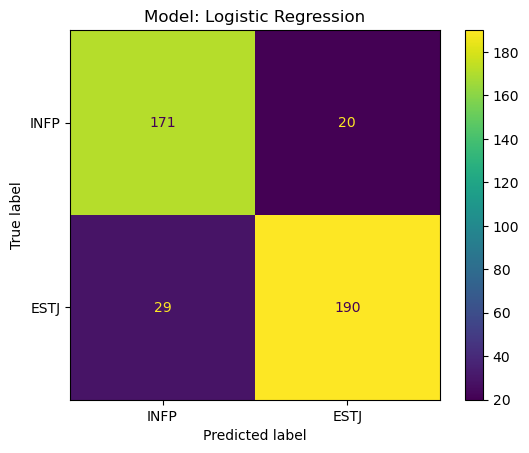

Classification Report for KNN:
              precision    recall  f1-score   support

        ESTJ       0.67      0.68      0.68       191
        infp       0.72      0.71      0.72       219

    accuracy                           0.70       410
   macro avg       0.70      0.70      0.70       410
weighted avg       0.70      0.70      0.70       410



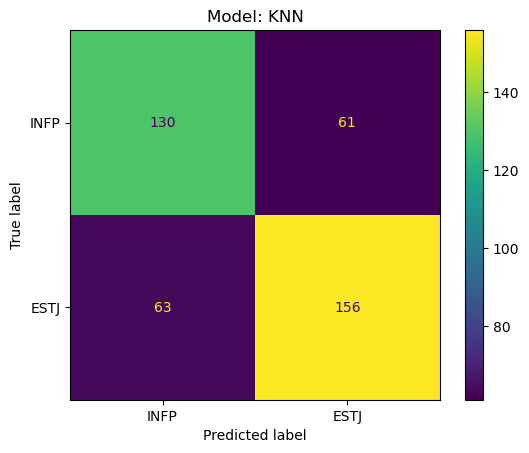

Classification Report for Bagged Decision Tree:
              precision    recall  f1-score   support

        ESTJ       0.81      0.87      0.84       191
        infp       0.88      0.82      0.85       219

    accuracy                           0.84       410
   macro avg       0.84      0.85      0.84       410
weighted avg       0.85      0.84      0.84       410



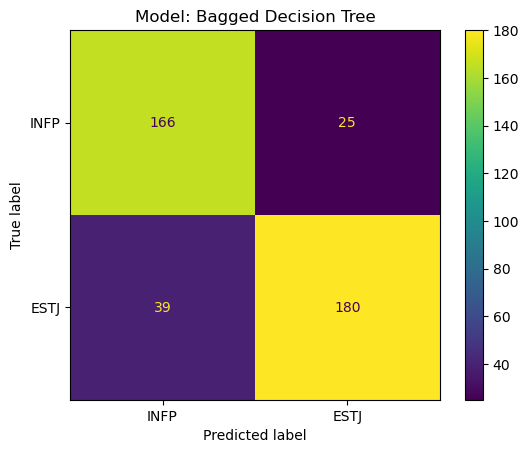

Classification Report for Random Forest:
              precision    recall  f1-score   support

        ESTJ       0.90      0.83      0.87       191
        infp       0.86      0.92      0.89       219

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



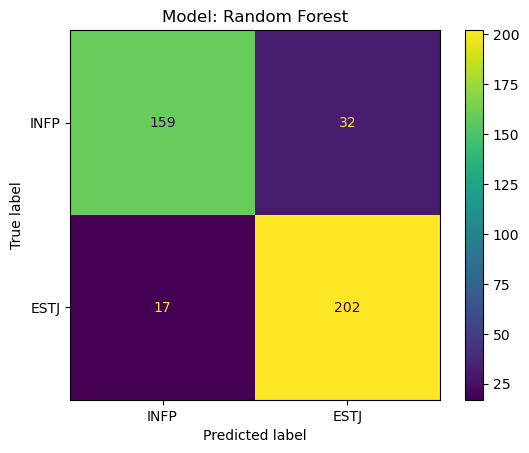

Classification Report for AdaBoost:
              precision    recall  f1-score   support

        ESTJ       0.74      0.73      0.73       191
        infp       0.77      0.77      0.77       219

    accuracy                           0.75       410
   macro avg       0.75      0.75      0.75       410
weighted avg       0.75      0.75      0.75       410



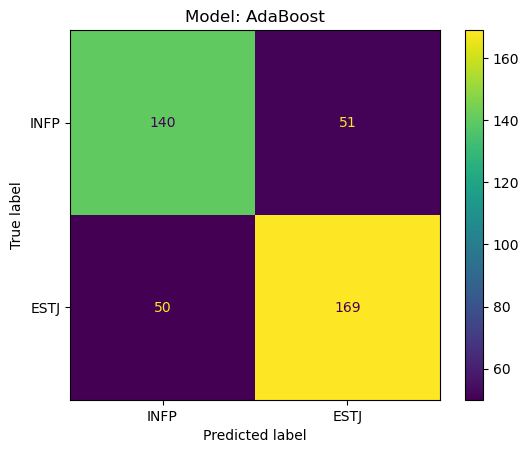

Classification Report for Gradient Boost:
              precision    recall  f1-score   support

        ESTJ       0.79      0.82      0.80       191
        infp       0.84      0.81      0.82       219

    accuracy                           0.81       410
   macro avg       0.81      0.81      0.81       410
weighted avg       0.82      0.81      0.81       410



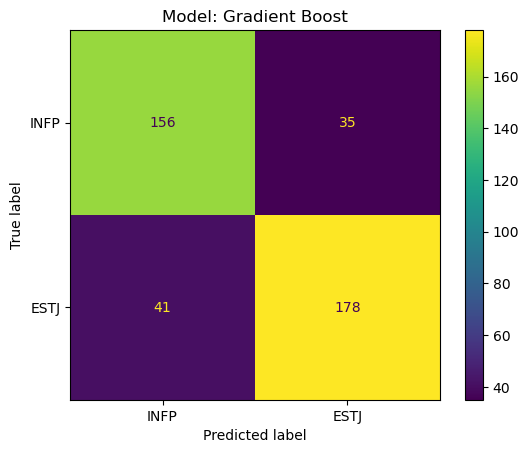

Classification Report for SVM:
              precision    recall  f1-score   support

        ESTJ       0.72      0.85      0.78       191
        infp       0.84      0.71      0.77       219

    accuracy                           0.78       410
   macro avg       0.78      0.78      0.78       410
weighted avg       0.79      0.78      0.78       410



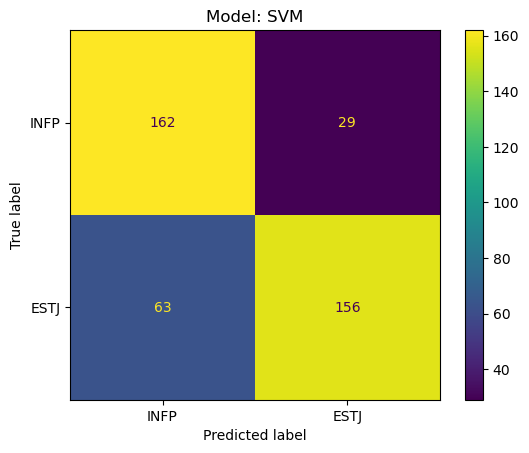

                  Model  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  0.880488   0.881580  0.880488  0.880610
1                   KNN  0.697561   0.697782  0.697561  0.697655
2  Bagged Decision Tree  0.843902   0.846234  0.843902  0.844085
3         Random Forest  0.880488   0.881957  0.880488  0.880024
4              AdaBoost  0.753659   0.753582  0.753659  0.753616
5        Gradient Boost  0.814634   0.815275  0.814634  0.814780
6                   SVM  0.775610   0.785830  0.775610  0.775337


In [581]:
# Create result data frame to store the score
results = []
coefficients_dfs = []  # To store coefficients for each model

for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_base_train, y_train)
    y_base_test_pred = clf.predict(X_base_test)
    
    accuracy = accuracy_score(y_test, y_base_test_pred)
    precision = precision_score(y_test, y_base_test_pred, average='weighted')
    recall = recall_score(y_test, y_base_test_pred, average='weighted')
    f1 = f1_score(y_test, y_base_test_pred, average='weighted')
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_base_test_pred))
    
    results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
    
    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_base_test_pred)
    ConfusionMatrixDisplay(cm, display_labels=['INFP', 'ESTJ']).plot()
    plt.title(f"Model: {model_name}")
    plt.show()

# Display the results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


## TUNING 3: Top 3 Models & Parameter Tuning

### Remark
 - based on th result in tuning 2, there are top 3 models that generate accuracy score and F1 score more than .70; these 3 models are logistic regression, random forest, and gradient boost
 - we will use only base model 3 data set from from tuning 1 section 
 X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
 - we will use only count vectorization, stemming = true , lemmanization = true
 - WE will test each of 3 the top 3 model separately
 - we will use tune parameter with grid search 
 - we will use the a text preprocessor function we defined in TUNING 2
        def preprocess_text(text):
            text = text.lower()
            text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
            # Remove specified columns after tokenization
            text = text.replace('infp', '').replace('estj', '').replace('infps', '').replace('estjs', '')
            return text

## TUNING 3.1 : Logistic Regression

### Feature Engineering, Modeling & Evaluating

In [582]:
# Lowercase Text
X_base_train['text'] = X_base_train['text'].str.lower()
X_base_test['text'] = X_base_test['text'].str.lower()

In [583]:
# Initialize Stemmer
stemmer = PorterStemmer()

# Stemming
X_base_train['text'] = X_base_train['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
X_base_test['text'] = X_base_test['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [584]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization
X_base_train['text'] = X_base_train['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
X_base_test['text'] = X_base_test['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [585]:
# Get English Stopwords
stop_words = set(stopwords.words('english'))

# Remove Stopwords
X_base_train['text'] = X_base_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_base_test['text'] = X_base_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [586]:
# Remove Specified Words
words_to_remove = ['infp', 'estj', 'infps', 'estjs']
X_base_train['text'] = X_base_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
X_base_test['text'] = X_base_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))


In [587]:
# Count Vectorization
vectorizer = CountVectorizer()
X_base_train_transformed = vectorizer.fit_transform(X_base_train['text'])
X_base_test_transformed = vectorizer.transform(X_base_test['text'])

In [588]:
# Convert to DataFrames
X_base_train_text_df = pd.DataFrame(X_base_train_transformed.toarray(), columns=vectorizer.get_feature_names_out())
X_base_test_text_df = pd.DataFrame(X_base_test_transformed.toarray(), columns=vectorizer.get_feature_names_out())

In [589]:
# Define the logistic regression model
logistic_regression = LogisticRegression(solver='saga')


In [590]:
# Display all available parameters for the logistic regression model
print("Available Parameters for Logistic Regression:")
logistic_regression.get_params()

Available Parameters for Logistic Regression:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [591]:
# Define hyperparameters for grid search
param_grid = {
    'max_iter': [100, 500, 1000],
    'C': [0.1, 1.0, 10.0],  # Add regularization parameter 'C'
    'penalty': ['l1', 'l2', 'None']  # Add regularization penalty type
}

In [592]:
# Create a grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [593]:
# Fit the grid search on the training data
grid_search.fit(X_base_train_text_df, y_train)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklear

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'None']},
             scoring='accuracy')

In [595]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

In [596]:
# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}


In [597]:
# Predictions on test data
y_train_pred = best_model.predict(X_base_train_text_df)
y_test_pred = best_model.predict(X_base_test_text_df)


In [598]:
# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)  # For comparison with test score


In [599]:
# Print evaluation metrics
print(f'Accuracy (test): {accuracy_test:.2f}')
print(f'Accuracy (train): {accuracy_train:.2f}')


Accuracy (test): 0.89
Accuracy (train): 0.99


In [600]:
# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred)
print(classification_rep)

              precision    recall  f1-score   support

        ESTJ       0.86      0.93      0.89       191
        infp       0.93      0.86      0.90       219

    accuracy                           0.89       410
   macro avg       0.89      0.89      0.89       410
weighted avg       0.90      0.89      0.89       410



In [601]:
# Generate confusion matrix and display
test_cm = confusion_matrix(y_test, y_test_pred)

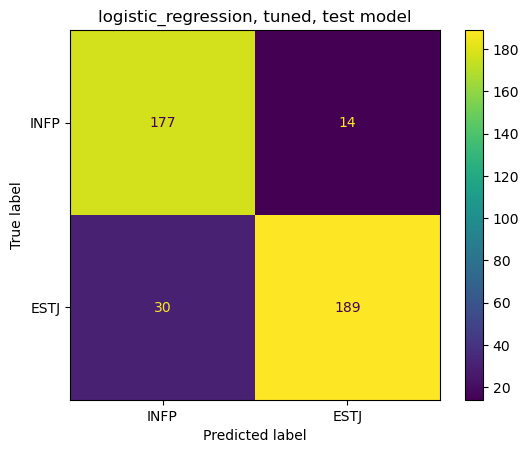

In [602]:
ConfusionMatrixDisplay(test_cm, display_labels=['INFP', 'ESTJ']).plot()
plt.title("logistic_regression, tuned, test model");

## TUNING 3.2 : Random Forest

### Feature Engineering, Modeling, and Evaluating

In [603]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)

In [604]:
# Create a grid search parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [605]:
# Create a grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [606]:
# Fit the grid search on the training data
grid_search.fit(X_base_train_text_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [607]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

In [608]:
# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [609]:
# Predictions on test data
y_train_pred = best_model.predict(X_base_train_text_df)
y_test_pred = best_model.predict(X_base_test_text_df)


In [610]:
# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)  # For comparison with test score

In [611]:
# Print evaluation metrics
print(f'Accuracy (test): {accuracy_test:.2f}')
print(f'Accuracy (train): {accuracy_train:.2f}')

Accuracy (test): 0.92
Accuracy (train): 1.00


In [612]:
# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred)
print(classification_rep)

              precision    recall  f1-score   support

        ESTJ       0.93      0.88      0.91       191
        infp       0.90      0.95      0.92       219

    accuracy                           0.92       410
   macro avg       0.92      0.92      0.92       410
weighted avg       0.92      0.92      0.92       410



In [613]:
# Generate confusion matrix and display
test_cm = confusion_matrix(y_test, y_test_pred)


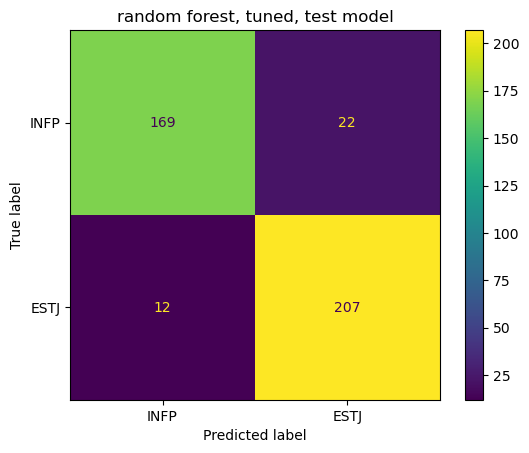

In [614]:
ConfusionMatrixDisplay(test_cm, display_labels=['INFP', 'ESTJ']).plot()
plt.title("random forest, tuned, test model");

## TUNING 3.3 : Gradient Boost

### Feature Engineering, Modeling, and Evaluating

In [615]:
# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [616]:
# Create a grid search parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}

In [617]:
# Create a grid search with cross-validation
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [618]:
# Fit the grid search on the training data
grid_search.fit(X_base_train_text_df, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [619]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

In [620]:
# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [621]:
# Predictions on test data
y_train_pred = best_model.predict(X_base_train_text_df)
y_test_pred = best_model.predict(X_base_test_text_df)


In [622]:
# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)  # For comparison with test score

In [623]:
# Print evaluation metrics
print(f'Accuracy (test): {accuracy_test:.2f}')
print(f'Accuracy (train): {accuracy_train:.2f}')

Accuracy (test): 0.90
Accuracy (train): 1.00


In [624]:
# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred)
print(classification_rep)

              precision    recall  f1-score   support

        ESTJ       0.89      0.91      0.90       191
        infp       0.92      0.90      0.91       219

    accuracy                           0.90       410
   macro avg       0.90      0.91      0.90       410
weighted avg       0.91      0.90      0.90       410



In [625]:
# Generate confusion matrix and display
test_cm = confusion_matrix(y_test, y_test_pred)

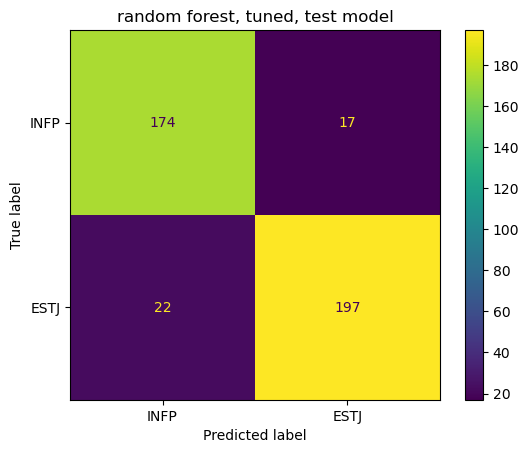

In [626]:
ConfusionMatrixDisplay(test_cm, display_labels=['INFP', 'ESTJ']).plot()
plt.title("random forest, tuned, test model");

## SUMMARY

 - for tunning 1, we do 4 combination of tuning which including vectorisation (count vs TF-IDF) and stemming/lemmanization (yes or no)
 - as a result, we have better test accuracy score, compared to base model 3, from 0.62 to 0.72 (for the best model) 
         
|Vectorization Method|Stemming|Lemmatization|Accuracy| 
|---|---|---|---|
|Count Vectorizer|True|True|0.88|
|Count Vectorizer|False|False|0.87|
|TF-IDF Vectorizer|True|True|0.83|
|TF-IDF Vectorizer|False|False|0.84| 

 - in addition, we find count vectorizer is much better than TF-IDF vectorizer 
 - but there is not much difference there is stemming/lemmanization 
 - for tunning 2, we have total 7 model for selection including Logistic Regression, KNN, Bagged Decision Tree, Random Forest, ADA Boost, G Boost, SVM
 - as a result, we have better 2 models that perform best including logistic regression, random forest

|Model|Accuracy|
|-----|--------|                   
|Logistic Regression|0.880488|   
|KNN|0.697561|
|Bagged Decision Tree|0.843902|
|Random Forest|0.880488|
|AdaBoost|0.753659|   
|Gradient Boost|0.814634| 
|SVM|0.775610|

 - there is no difference between top 2 model without parameter tuning; both are at 0.88
 - for tunning 3, we do parameter tunning for each model
 - as result, we found that random forest has best performance, followed very closely by logistic regression. 
      
       - logistic regression train at 0.99 vs test at 0.89 --> 0.10 gap
       - random forest train at 1.0 vs test at 0.92 ---> 0.08 gap

-------------------------------------

# FINAL CONCLUSION & RECOMMENDATION

## Conclusion

 - there is high potential for MBTI classification in online conversation, considering ver high accuracy score of our best model (random forest) at 0.79 but it is still very overfit model because train comapare to test score has the big gap 0.21. 
 - we need to accumulate more post to get more data to improve our score and redut overfitting 

## Recommendation

 - currently the result is still not sufficient for business application beucase we still only use only 2 personality type post to do classify. however the result suggest that we can move step 2 which is collect data from 16 personality type post do 16 personality class classification. 